# 1. Dataset and Features

We are using the Spotify dataset. In this project, we wish to explore the relationship between the various numerical columns in the Spotify dataset to create predictions about a track given its characteristics. Specifically, we're interested in the correlations between numerical columns such as valence, energy, danceability, speechiness, and instrumentalness. Understanding these correlations will allow us to predict statistics such as popularity based on other track information.  

We start by importing the dataset (shown below), using the `pandas` link from HuggingFace.
Note for project members: you have to run this every time you reopen the notebook.

In [63]:
import pandas as pd
import tqdm as notebook_tqdm
spotify = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

# Dropping the Unnamed column (which is just the row index)
spotify = spotify.drop(columns=['Unnamed: 0'])

In [61]:
# import some libraries
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.options.mode.copy_on_write = True

# 2. Getting started

Print out the columns of the dataset.
Print out the first 20 rows of the dataset.

In [4]:
spotify.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [5]:
spotify.head(20)

Unnamed: 0                track_id                               artists  \
0            0  5SuOikwiRyPMVoIQDJUgSV                           Gen Hoshino   
1            1  4qPNDBW1i3p13qLCt0Ki3A                          Ben Woodward   
2            2  1iJBSr7s7jYXzM8EGcbK5b                Ingrid Michaelson;ZAYN   
3            3  6lfxq3CG4xtTiEg7opyCyx                          Kina Grannis   
4            4  5vjLSffimiIP26QG5WcN2K                      Chord Overstreet   
5            5  01MVOl9KtVTNfFiBU9I7dc                          Tyrone Wells   
6            6  6Vc5wAMmXdKIAM7WUoEb7N  A Great Big World;Christina Aguilera   
7            7  1EzrEOXmMH3G43AXT1y7pA                            Jason Mraz   
8            8  0IktbUcnAGrvD03AWnz3Q8             Jason Mraz;Colbie Caillat   
9            9  7k9GuJYLp2AzqokyEdwEw2                        Ross Copperman   
10          10  4mzP5mHkRvGxdhdGdAH7EJ                          Zack Tabudlo   
11          11  5ivF4eQBqJiVL5IAE9jRyl                            Jason Mraz   
12          12  4ptDJbJl35d7gQfeNteBwp                              Dan Berk   
13          13  0X9MxHR1rTkEHDjp95F2OO                         Anna Hamilton   
14          14  4LbWtBkN82ZRhz9jqzgrb3              Chord Overstreet;Deepend   
15          15  1KHdq8NK9QxnGjdXb55NiG                           Landon Pigg   
16          16  6xKeQgzfjixSUld14qUezm                  Andrew Foy;Renee Foy   
17          17  4Yo0igmcoNyat1secaH0OD                  Andrew Foy;Renee Foy   
18          18  2qLMf6TuEC3ruGJg4SMMN6             Jason Mraz;Colbie Caillat   
19          19  6CgNoAbFJ4Q4Id4EjtbXlC               Boyce Avenue;Bea Miller   

                                           album_name  \
0                                              Comedy   
1                                    Ghost (Acoustic)   
2                                      To Begin Again   
3   Crazy Rich Asians (Original Motion Picture Sou...   
4                                             Hold On   
5                                Days I Will Remember   
6                         Is There Anybody Out There?   
7                 We Sing. We Dance. We Steal Things.   
8                 We Sing. We Dance. We Steal Things.   
9                                              Hunger   
10                                            Episode   
11                         Love Is a Four Letter Word   
12                                               Solo   
13                                           Bad Liar   
14                                    Hold On (Remix)   
15                                  The Boy Who Never   
16                              ily (i love you baby)   
17                                        At My Worst   
18                We Sing. We Dance. We Steal Things.   
19                             Cover Sessions, Vol. 4   

                          track_name  popularity  duration_ms  explicit  \
0                             Comedy          73       230666     False   
1                   Ghost - Acoustic          55       149610     False   
2                     To Begin Again          57       210826     False   
3         Can't Help Falling In Love          71       201933     False   
4                            Hold On          82       198853     False   
5               Days I Will Remember          58       214240     False   
6                      Say Something          74       229400     False   
7                          I'm Yours          80       242946     False   
8                              Lucky          74       189613     False   
9                             Hunger          56       205594     False   
10              Give Me Your Forever          74       244800     False   
11                   I Won't Give Up          69       240165     False   
12                              Solo          52       198712     False   
13                          Bad Liar          62       248448     False   


In [6]:
# Get 20 random rows
spotify.sample(20)

Unnamed: 0                track_id  \
97703        97703  0Xyai3VqkT2sujXvF58zDQ   
14937        14937  7ImvgDdmUPntMJY9jw9pzg   
3369          3369  58h6KRFgwbAKvWE11fxqY0   
101297      101297  5LCe1aLRmkDknpeNpiva68   
84030        84030  25naGBZ4ZdgPVa54RH3ZfP   
21515        21515  3QGkF5RRFR9RWTJciGTMf2   
71789        71789  4N4rKm6cAmSYQwuKV71YmS   
26696        26696  7H5Yv9htHyHTLr633cOuOR   
77112        77112  19u7ucz8tazDZL1daf5y23   
42765        42765  1Te1HcbOWbU4CmZ3wVqlvo   
56062        56062  0SpkyS1Q4MD8GaVcP5YjT4   
76981        76981  30Eu5OQ1LK7tJIehc4uWdb   
48472        48472  3UazjRonjMgFBOYjfOxAm7   
90696        90696  34Nc86qo5wreXTDX496TRB   
102709      102709  69zxopckIPTya73oBGdE2v   
38164        38164  3koAwrM1RO0TGMeQJ3qt9J   
89647        89647  3Z5bdTJfjTvEJIzA27Jtk6   
44836        44836  442YgzY4YBcE3UXFRrczJb   
53839        53839  3monb6DDZJSxJ9fR6au4Ba   
104907      104907  48MV06p1Hd0KE1MM2KhR1c   

                                   artists  \
97703                           Max e Luan   
14937                   The Countdown Kids   
3369                          Bella Poarch   
101297                  Weißes Rauschen HD   
84030                       The Beach Boys   
21515                  Kranium;Queen Naija   
71789                           Oficina G3   
26696                      Germaine Franco   
77112              LUDMILLA;Vou pro Sereno   
42765                            Trap Them   
56062                 Cigarettes After Sex   
76981                          Susan Boyle   
48472                          Boysetsfire   
90696                  The Walker Brothers   
102709  Jasleen Royal;Fresh Talent Studios   
38164                         Good Morning   
89647         Joey Montana;Sebastian Yatra   
44836                      My Darkest Days   
53839               Sonny Fodera;Ella Eyre   
104907                        MELER;Lérica   

                                               album_name  \
97703                                                  4G   
14937        Happy Halloween! (Spooky Favorites for Kids)   
3369                                         Pop Brandneu   
101297  Weißes Geräusch Für Tiefen Schlaf, Tinnitus Un...   
84030                               Christmas Eve At Home   
21515                     Without You (feat. Queen Naija)   
71789                                                Cego   
26696               Encanto (Svenskt Original Soundtrack)   
77112                                  Numanice (Ao vivo)   
42765                           Seizures in Barren Praise   
56062                                Cigarettes After Sex   
76981                                                 TEN   
48472       The Misery Index: Notes From The Plague Years   
90696                   (60's) Sixties Collected Volume 2   
102709                             Nit Nit (Lofi Version)   
38164                                       Prize//Reward   
89647                              Halloween con perreito   
44836            Sick And Twisted Affair (Deluxe Edition)   
53839                                       Cardio Tracks   
104907                                            Alarmas   

                             track_name  popularity  duration_ms  explicit  \
97703                                4G          46       162624     False   
14937                 This Is Halloween           0       196000     False   
3369                        Living Hell           0       174002     False   
101297    Weißes Rauschen: Schlafmittel          43        94365     False   
84030    Little Saint Nick - 1991 Remix           0       118840     False   
21515   Without You (feat. Queen Naija)          55       205248     False   
71789                              Cego          40       195428     False   
26696                   Jag behöver dig          20       147520     False   
77112               Tô de Boa - Ao vivo          53       172750     False   
42765       

In [7]:
# Check the shape of spotify dataset
spotify.shape

(114000, 21)

In [8]:
# Sanity check: get the counts of each artist and track_name combination
counts = spotify.groupby(['artists', 'track_name']).size().reset_index(name='count')
print(counts)
print("There are " + str(sum(counts['count'] != 1)) + " artist, track_name combinations that are non-unique.")

                     artists  \
0                     !nvite   
1                     !nvite   
2      "Puppy Dog Pals" Cast   
3      "Puppy Dog Pals" Cast   
4        "Weird Al" Yankovic   
...                      ...   
81338                     黃妃   
81339                    黃小琥   
81340                    黃敏華   
81341                龍藏Ryuzo   
81342                龍藏Ryuzo   

                                              track_name  count  
0                                               pagadoff      1  
1                                              strolling      1  
2                                     Going on a Mission      1  
3                        Puppy Dog Pals Main Title Theme      1  
4      Amish Paradise (Parody of "Gangsta's Paradise"...      1  
...                                                  ...    ...  
81338                                              溫暖的所在      1  
81339                                              沒那麽簡單      1  
81340                

### Sanity checks!

- Are there any entries with null values
- Do numbers fall in the expected range


In [9]:
# popularity between 0 and 100
sum(spotify['popularity'] < 0) + sum(spotify['popularity'] > 100)

0

In [10]:
# danceability between 0.0 and 1.0
sum(spotify['danceability'] < 0.0) + sum(spotify['danceability'] > 1.0)

0

In [11]:
# energy is between 0.0 to 1.0
sum(spotify['energy'] < 0.0) + sum(spotify['energy'] > 1.0)

0

In [12]:
# mode is 0 or 1
sum(x not in [0,1] for x in spotify['mode'])

0

In [13]:
# speechiness between 0.0 and 1.0
sum(spotify['speechiness'] < 0.0) + sum(spotify['speechiness'] > 1.0)

0

In [14]:
# acousticness between 0.0 and 1.0
sum(spotify['acousticness'] < 0.0) + sum(spotify['acousticness'] > 1.0)

0

In [15]:
# instrumentalness between 0.0 and 1.0
sum(spotify['instrumentalness'] < 0.0) + sum(spotify['instrumentalness'] > 1.0)

0

In [16]:
# liveness between 0.0 and 1.0
sum(spotify['liveness'] < 0.0) + sum(spotify['liveness'] > 1.0)

0

In [17]:
# valence between 0.0 and 1.0
sum(spotify['valence'] < 0.0) + sum(spotify['valence'] > 1.0)

0

In [18]:
# positive tempo
sum(spotify['tempo'] < 0.0)

0

In [19]:
# time signature between 3 and 7 (inclusive)
sum(spotify['time_signature'] < 3) + sum(spotify['time_signature'] > 7)

1136

### Let's visualize some missing values!

In [20]:
# identify whether each tempo value is zero
# and group by genre (index)
# count number of zero values
zero_tempo_by_genre = spotify.set_index("track_genre")["tempo"].eq(0).groupby(level=0).sum()

# Convert the result to a DataFrame 
zero_tempo_by_genre_df = zero_tempo_by_genre.reset_index()

# Create a bar chart 
px.bar(zero_tempo_by_genre_df,
       x='track_genre',
       y='tempo',  # The count of zero tempo values
       labels={'0': 'Number of zero tempo values', 'genre': 'Genre'},
       title="Zero Tempo Values by Genre")

In [21]:
# identify whether each valence value is zero
# and group by genre (index)
# count number of zero values
zero_valence_by_genre = spotify.set_index("track_genre")["valence"].eq(0).groupby(level=0).sum()

# Convert the result to a DataFrame 
zero_valence_by_genre_df = zero_valence_by_genre.reset_index()

# Create a bar chart 
px.bar(zero_valence_by_genre_df,
       x='track_genre',
       y='valence',  # The count of zero valence values
       labels={'0': 'Number of zero valence values', 'genre': 'Genre'},
       title="Zero Valence Values by Genre")

In [22]:
# Filter time_signatures for values that are either less than 3 or greater than 7
invalid_time_signatures = spotify.set_index("track_genre")["time_signature"] \
    .apply(lambda x: x < 3 or x > 7)  # Create a boolean series where True indicates invalid values

# Group by track_genre and sum the invalid counts
time_signatures = invalid_time_signatures.groupby(level=0).sum()

time_signatures_df = time_signatures.reset_index()

# Create a bar chart 
px.bar(time_signatures_df,
       x = 'track_genre',
       y='time_signature',  # The count of invalid time signature values
       labels={'0': 'Number of invalid time signatures', 'genre': 'Genre'},
       title="Invalid Time Signature by Genre")


# 2. Exploratory Data Analysis (EDA)

## Examining relationships between single variables

### Danceability and Energy

Danceability describes how easy it is to dance to a song, while energy measures how intense and active a track is. One would expect these to have a positive correlation, which the graph shows to a small extent.

Text(0.5, 1.0, 'Energy and Danceability of Spotify Tracks')

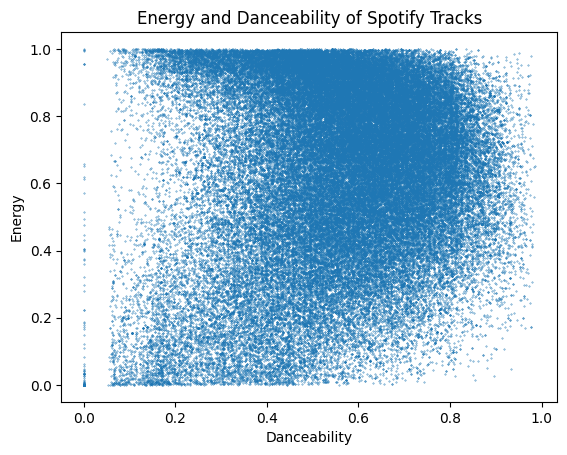

In [23]:
danceability = spotify['danceability']
energy = spotify['energy']
plt.scatter(danceability, energy, s=0.1)
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Energy and Danceability of Spotify Tracks')

### Valence and Danceability

Valence is a measure describing how "positive" a track is, while danceability describes how suitable a track is to dance to. One might expect the two to have a positive correlation since more upbeat songs are often faster and more rhythmic, and thus easier to dance to.

Text(0.5, 1.0, 'Valence and Danceability of Spotify Tracks')

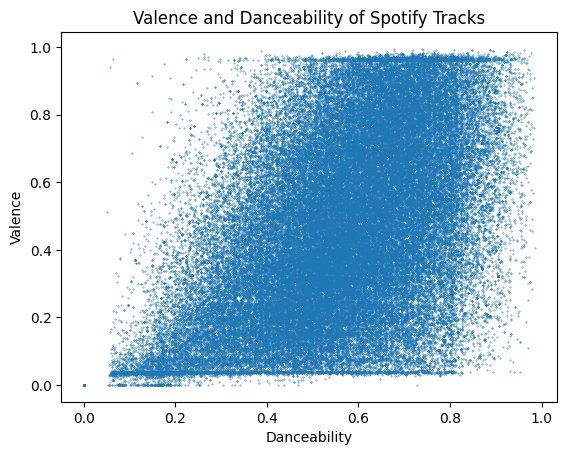

In [33]:
danceability = spotify['danceability']
energy = spotify['valence']
plt.scatter(danceability, energy, s=0.1)
plt.xlabel('Danceability')
plt.ylabel('Valence')
plt.title('Valence and Danceability of Spotify Tracks')

### Speechiness and Instrumentalness

Speechiness measures the presence of spoken words in a song, while instrumentalness predicts if a song contains no vocals. These two should be inversely related, which this graph somewhat shows.

Text(0.5, 1.0, 'Speechiness and Instrumentalness of Spotify Tracks')

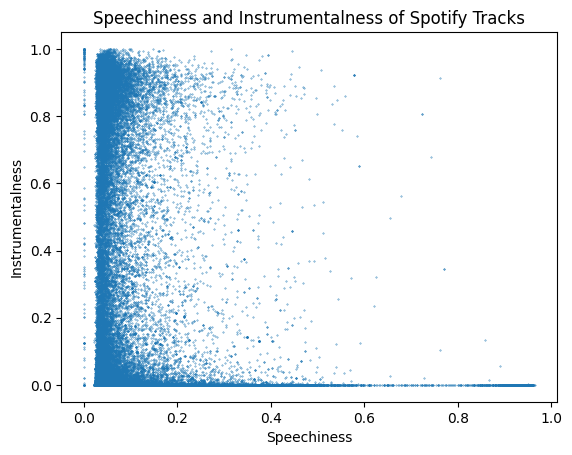

In [51]:
speechiness = spotify['speechiness']
instrumentalness = spotify['instrumentalness']
plt.scatter(speechiness, instrumentalness, s=0.1)
plt.xlabel('Speechiness')
plt.ylabel('Instrumentalness')
plt.title('Speechiness and Instrumentalness of Spotify Tracks')

### Energy and Loudness

Energy measures how intense and active a track is, while loudness measures the volume of the song (in decibels). One would expect these two to have a positive correlation, which is shown by the graph.

Text(0.5, 1.0, 'Energy and Loudness of Spotify Tracks')

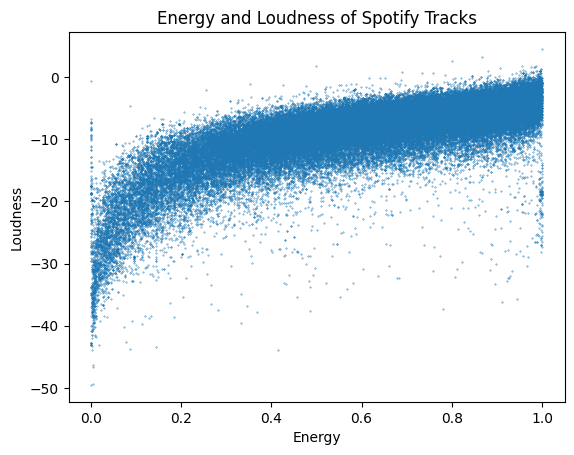

In [50]:
danceability = spotify['energy']
energy = spotify['loudness']
plt.scatter(danceability, energy, s=0.1)
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.title('Energy and Loudness of Spotify Tracks')

### Popularity with Respect to Valence and Danceability

Popularity measures how popular a song is. Valence and danceability are both numerical measures of how "positive" a track is, and how suitable it is to dance to, respectively. 

The heatmap below will show the correlation between valence, danceability, and tracks with low popularity (defined as popularity below 10). 

/var/folders/gq/d0dlgtj95v1g3_k9gdrkb1zr0000gn/T/ipykernel_57317/4192607146.py:10: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



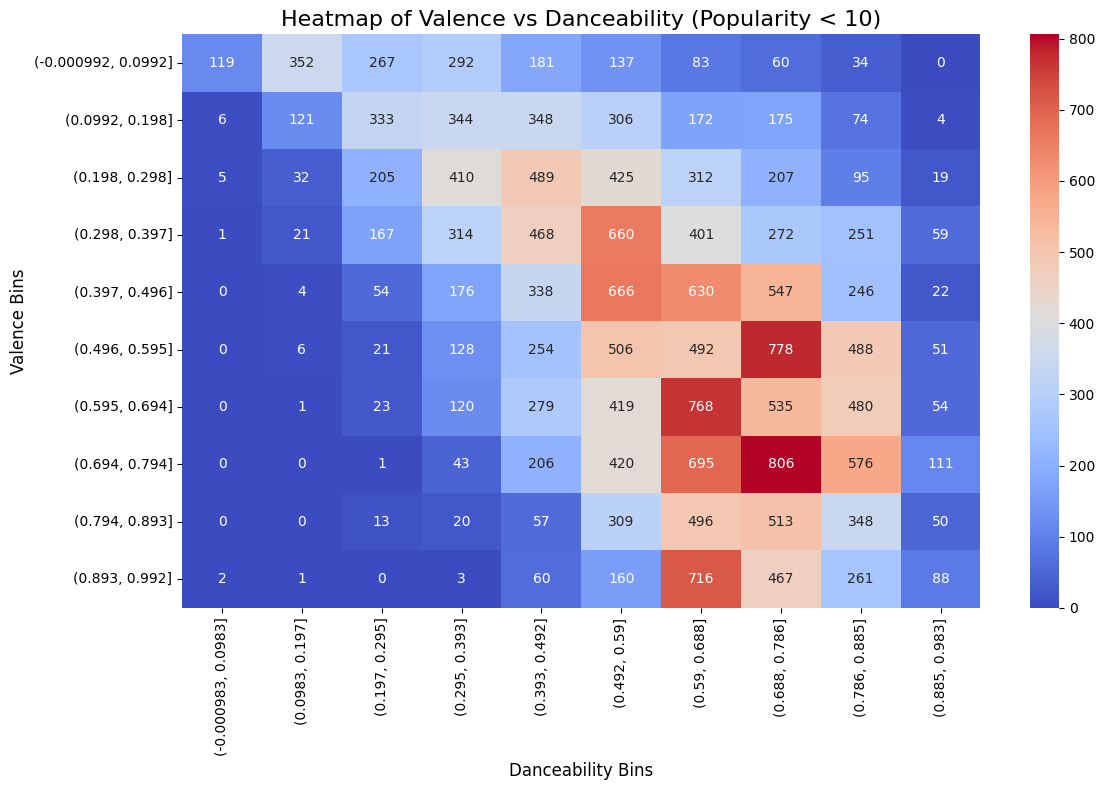

In [52]:
import seaborn as sns
# Filter the DataFrame for tracks where 'popularity' < 10
spotify_filtered = spotify[spotify['popularity'] < 10]

# Put 'valence' and 'danceability' into bins
spotify_filtered['valence_bin'] = pd.cut(spotify_filtered['valence'], bins=10)
spotify_filtered['danceability_bin'] = pd.cut(spotify_filtered['danceability'], bins=10)

# Create a table where rows are binned 'valence' and columns are binned 'danceability', and values are the counts
heatmap_data = spotify_filtered.pivot_table(index='valence_bin', columns='danceability_bin', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 8))

# Create the heatmap with seaborn
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d')

# Add labels and title
plt.title('Heatmap of Valence vs Danceability (Popularity < 10)', fontsize=16)
plt.xlabel('Danceability Bins', fontsize=12)
plt.ylabel('Valence Bins', fontsize=12)

plt.tight_layout()
plt.show()

# 3. Feature Imputation
The Spotify dataset contains many missing values, which are largely encoded as placeholders, although `null` values are also used. Such values are incompatible with our models as they create nonsensical patterns in the data. 

A basic strategy (shown below) would be to discard entire rows or columns which contain the missing or placeholder values. However, the data lost may be valuable, and it may be a better strategy to **impute** values by inferring them from known data. 

Below are some features which we have identified as missing or placeholder values: 

- Remove duplicate rows (same artist, same song, different genre or album)
  - These will have different track IDs
- Replace missing values
- Remove "Unnamed: 0" column (which is just the row number)

- Missing value:
  - Explicit = unknown
  - Key = -1

- Time signatures < 3 and > 7
  - Time signature of 0, usually means "sleep" genre

### Note for project members
**Warning**: `inPlace = True` will modify the original DataFrame. For example, if you `drop_duplicates inPlace`, the original spotify DataFrame will now never contain duplicates.

`drop_duplicates` has a `subset` argument. It will consider two rows duplicates if they have the same values for `subset`.

In [56]:
# Remove duplicate rows (the same song by same artist under different genre or album)
spotify_new = spotify.drop_duplicates(subset=['artists', 'track_name'], keep='first')
spotify_new.shape

(81344, 21)

### `impute_feature()` function

To handle any potential missing values or placeholders in the data. 

Because the Spotify dataset has many "placeholder" values rather than NaN or real missing data, we found it helpful to specify a `placeholder_value` which will be treated as a NaN value. 

In [46]:
def impute_feature(data, feature, group, impute_method="average", placeholder_value = 0):
  '''
  Imputes missing or placeholder values in a specified feature column based on the given impute method.
  
  Parameters:
  - data (pandas.DataFrame): The DataFrame containing the data to impute.
  - feature (str): The name of the column where missing or placeholder values should be imputed.
  - group (str or list of str): Column(s) by which to group the data before applying the imputation.
  - impute_method (str, optional): The method used to impute the missing values. Defaults to "average". Currently, 
    only "average" is supported. This method performs forward and backward fills, then takes the average of both.
  - placeholder_value (numeric, optional): The placeholder value (like 0) that should be treated as missing, used
    when impute_method is "placeholder". Defaults to 0.

  Returns:
  - pandas.Series: A Series with the imputed values for the specified feature.

  Raises:
  - ValueError: If an unsupported impute method is provided.
  '''
  if(impute_method == "placeholder"):
    # Replace placeholder values with NaN
    data[feature] = data[feature].replace(placeholder_value, np.nan)

  if impute_method in ["average", "placeholder"]:
    # Change the impute method argument to lowercase
    impute_method = impute_method.lower()
    # Create 2 temp variables equal to feature
    data = data.assign(imputed_feature_prev=data[feature], imputed_feature_next=data[feature])
    # Fill first var with forward fill
    data["imputed_feature_prev"] = data.groupby(group)["imputed_feature_prev"].ffill()
    # Fill second var with backward fill
    data["imputed_feature_next"] = data.groupby(group)["imputed_feature_next"].bfill()
    # Define feature_imputed column to be mean of the forward and backward fill
    data["feature_imputed"] = data[["imputed_feature_next", "imputed_feature_prev"]].mean(axis=1, skipna=True)
    # Impute remaining missing values with 0
    data["feature_imputed"] = data["feature_imputed"].fillna(0)
    # Remove two temp vars
    data = data.drop(columns=["imputed_feature_prev", "imputed_feature_next"])
    return data["feature_imputed"]
  else:
    raise ValueError("Invalid impute_method")

In [47]:
# Test impute_feature and placeholder_value argument
spotify["imputed_valence"] = impute_feature(spotify, 
                                            feature = "valence", 
                                            group = "track_genre",
                                            impute_method = "placeholder", 
                                            placeholder_value = 0.0995)

spotify[["track_name", "popularity", "danceability", "energy", "valence", "imputed_valence"]].sample(20, random_state=1259)

track_name  popularity  \
93786                                Zachem ja vljubilsja           0   
38390                                     Most Hated Girl          30   
16842   12 Variations in C Major on "Ah, vous dirai-je...          15   
33558                                             Выродок          50   
36771                                              Tududu          33   
21883                                  Pa Abajo - Tic-Toc          26   
100695                                      Österlenvisan          34   
1338                                           Kinkinzazo          25   
90163                     I'm On The Outside (Looking In)          42   
110983                               Genesis - Radio Edit          27   
97666                         Na Linha do Tempo - Ao Vivo          45   
71249                  Here I Go Again 87 - 2018 Remaster           0   
10091                                           She Moves          20   
22595                                          Seeing Red          22   
83306                                     Hot Air Balloon          66   
66436                                        Monster Mash          13   
61154                                               Hate?          52   
92584                                  Kom ner från taket          26   
28121                             That’s Why (with GOLDN)          51   
92027                             Route 66 - Stereo Remix           1   

        danceability  energy  valence  imputed_valence  
93786          0.377   0.181      NaN            0.254  
38390          0.361   0.957    0.619            0.619  
16842          0.435   0.094    0.818            0.818  
33558          0.760   0.753    0.249            0.249  
36771          0.784   0.449    0.536            0.536  
21883          0.877   0.937    0.790            0.790  
100695         0.620   0.892    0.863            0.863  
1338           0.688   0.948    0.957            0.957  
90163          0.383   0.282    0.246            0.246  
110983         0.500   0.996    0.116            0.116  
97666          0.528   0.533    0.345            0.345  
71249          0.367   0.824    0.253            0.253  
10091          0.748   0.769    0.861            0.861  
22595          0.200   0.973    0.148            0.148  
83306          0.815   0.710    0.572            0.572  
66436          0.768   0.674    0.781            0.781  
61154          0.349   0.988    0.422            0.422  
92584          0.526   0.901    0.786            0.786  
28121          0.487   0.621    0.178            0.178  
92027          0.755   0.642    0.969            0.969

In [48]:
def impute_closest_danceability(data, feature):
    '''
    Imputes missing values in the specified feature by using the closest non-missing value
    in terms of danceability within the same genre.

    Parameters:
    - data (pandas.DataFrame): The DataFrame containing the data to impute.
    - feature (str): The name of the column where missing values should be imputed.

    Returns:
    - pandas.Series: A Series with the imputed values for the specified feature.
    '''
    genre_col = "track_genre"
    danceability_col = "danceability"
    def find_closest_danceability(row, group):
        # Find the non-missing values within the same group
        non_missing = group.dropna(subset=[feature])
        # Compute absolute difference in danceability
        non_missing['danceability_diff'] = (non_missing[danceability_col] - row[danceability_col]).abs()
        # Return the value of the closest row in terms of danceability
        closest_row = non_missing.loc[non_missing['danceability_diff'].idxmin()]
        return closest_row[feature]
    
    # Group by genre 
    grouped = data.groupby(genre_col)
    
    # Apply the imputation logic for missing values
    data[feature] = data.apply(lambda row: find_closest_danceability(row, grouped.get_group(row[genre_col]))
                               if pd.isna(row[feature]) else row[feature], axis=1)
    
    return data[feature]

In [49]:
# Test impute_closest_danceability
impute_closest_danceability(spotify, feature = "valence")

spotify[["track_name", "popularity", "danceability", "energy", "valence", "imputed_valence"]].sample(20, random_state=1259)

track_name  popularity  \
93786                                Zachem ja vljubilsja           0   
38390                                     Most Hated Girl          30   
16842   12 Variations in C Major on "Ah, vous dirai-je...          15   
33558                                             Выродок          50   
36771                                              Tududu          33   
21883                                  Pa Abajo - Tic-Toc          26   
100695                                      Österlenvisan          34   
1338                                           Kinkinzazo          25   
90163                     I'm On The Outside (Looking In)          42   
110983                               Genesis - Radio Edit          27   
97666                         Na Linha do Tempo - Ao Vivo          45   
71249                  Here I Go Again 87 - 2018 Remaster           0   
10091                                           She Moves          20   
22595                                          Seeing Red          22   
83306                                     Hot Air Balloon          66   
66436                                        Monster Mash          13   
61154                                               Hate?          52   
92584                                  Kom ner från taket          26   
28121                             That’s Why (with GOLDN)          51   
92027                             Route 66 - Stereo Remix           1   

        danceability  energy  valence  imputed_valence  
93786          0.377   0.181    0.272            0.254  
38390          0.361   0.957    0.619            0.619  
16842          0.435   0.094    0.818            0.818  
33558          0.760   0.753    0.249            0.249  
36771          0.784   0.449    0.536            0.536  
21883          0.877   0.937    0.790            0.790  
100695         0.620   0.892    0.863            0.863  
1338           0.688   0.948    0.957            0.957  
90163          0.383   0.282    0.246            0.246  
110983         0.500   0.996    0.116            0.116  
97666          0.528   0.533    0.345            0.345  
71249          0.367   0.824    0.253            0.253  
10091          0.748   0.769    0.861            0.861  
22595          0.200   0.973    0.148            0.148  
83306          0.815   0.710    0.572            0.572  
66436          0.768   0.674    0.781            0.781  
61154          0.349   0.988    0.422            0.422  
92584          0.526   0.901    0.786            0.786  
28121          0.487   0.621    0.178            0.178  
92027          0.755   0.642    0.969            0.969

# 4. Train/Test/Validation Set Creation

In [75]:
from sklearn.model_selection import train_test_split

spotify_train_val, spotify_test = train_test_split(spotify, test_size=0.2, random_state=42)
spotify_train, spotify_val = train_test_split(spotify_train_val, test_size=0.25, random_state=42)

In [78]:
# Verifying lengths of train, test, val sets
print(f'Train set length: {len(spotify_train)}')
print(f'Test set length: {len(spotify_test)}')
print(f'Validation set length: {len(spotify_val)}')

Train set length: 68400
Test set length: 22800
Validation set length: 22800


# Week 2 Check In

1. Choose a response variable (numeric, not discrete). 
- y = loudness
2. Choose a predictor variable. 
- X = energy
3. Model the regression and calculate the evaluation metrics on training and validation datasets. 
4. Answer in your notebook if you see evidence of overfitting or underfitting.
5. Use one regularization technique and evaluate its performance.
6. Include code and explanation for the steps above in your notebook.

## 1. Response variable

We will use loudness for our response variable.

In [135]:
y_train = np.array(spotify_train['loudness'])

## 2. Predictor variable

We will use energy for our predictor variable, since it seems to have a mostly linear relationship with loudness.

In [138]:
X_train = np.array(spotify_train['energy']).reshape(-1, 1)

## 3. Modeling Regression

In [151]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp

In [152]:
ls_area_fit = LinearRegression()
ls_area_fit.fit(X_train, y_train)
y_pred = ls_area_fit.predict(X_train)

slope = ls_area_fit.coef_[0]
intercept = ls_area_fit.intercept_

print(f'Slope: {slope}')
print(f'Intercept: {intercept}')

Slope: 15.263372679352132
Intercept: -18.051778621340926


In [153]:
pred_df = pd.DataFrame({
    'X': X_train.flatten(),
    'y': y_train,
    'y_pred': y_pred
})

fig = px.scatter(spotify_train, x='energy', y='loudness')
regression_line = px.line(pred_df, x='X', y='y_pred')
regression_line.update_traces(line=dict(color='red'))
fig.add_traces(regression_line.data)
fig.show()

In [194]:
X_test = np.array(spotify_test['energy']).reshape(-1, 1)
y_test = np.array(spotify_test['loudness'])

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    ls_area_fit, X_train, y_train, X_test, y_test,
    loss='mse',
    random_seed=42
)

print(f'Square root of Average expected loss: {np.sqrt(avg_expected_loss):.4f}')
print(f'Average bias: {np.sqrt(avg_bias):.4f}')
print(f'Average std: {np.sqrt(avg_var):.4f}')

Square root of Average expected loss: 3.2318
Average bias: 3.2318
Average std: 0.0225


## 4. Overfitting or Underfitting?

Our model has very low variance and high bias, so there could be some evidence of underfitting. Looking at the graph, it appears that the data seems to curve downward slightly in a fashion reminiscent of a logarithm. The model would likely benefit by introducing a way for it to be non-linear, so it could better capture the trend of the data

## 5. Regularization

We will use ridge regularization on our model. This is likely not necessary or helpful since we don't have any issue with overfitting, but it will still be an instructive experience.

In [179]:
X = spotify_train['energy']
X_std = (X - X.mean()) / X.std()
y = spotify['loudness']

In [185]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(spotify_train['energy'].values.reshape(-1, 1))
X_test_scaled = scaler.fit_transform(spotify_test['energy'].values.reshape(-1, 1))
print(X_train_scaled, '\n')
print(X_test_scaled)

[[-0.29009375]
 [ 0.74361663]
 [ 0.05580165]
 ...
 [ 0.26651953]
 [ 0.94240709]
 [ 0.902649  ]] 

[[-0.18048342]
 [ 1.40997113]
 [ 0.63666741]
 ...
 [ 0.33770979]
 [ 0.42939013]
 [ 0.45330674]]


In [195]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

alphas = [0.0, 0.1, 1.0, 10.0, 100.0]

ridge_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, spotify_train['loudness'])
    y_pred = ridge.predict(X_train_scaled)
    mse = mean_squared_error(spotify_train['loudness'], y_pred)
    ridge_scores.append(mse)

ridge = Ridge(alpha=1.0)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    estimator=ridge,
    X_train=X_train_scaled,
    y_train=spotify_train['loudness'].values,
    X_test=X_test_scaled,
    y_test=spotify_test['loudness'].values,
    loss='mse',
    random_seed=42
)

print(f'Square root of Average expected loss: {np.sqrt(avg_expected_loss):.4f}')
print(f'Average bias: {np.sqrt(avg_bias):.4f}')
print(f'Average std: {np.sqrt(avg_var):.4f}')

ridge.fit(X_train_scaled, spotify_train['loudness'])

y_pred_train = ridge.predict(X_train_scaled)

print(f'\nRidge Coefficient (slope): {ridge.coef_[0]:.4f}')
print(f'Ridge Intercept: {ridge.intercept_:.4f}')

Square root of Average expected loss: 3.2323
Average bias: 3.2323
Average std: 0.0225

Ridge Coefficient (slope): 3.8390
Ridge Intercept: -8.2685


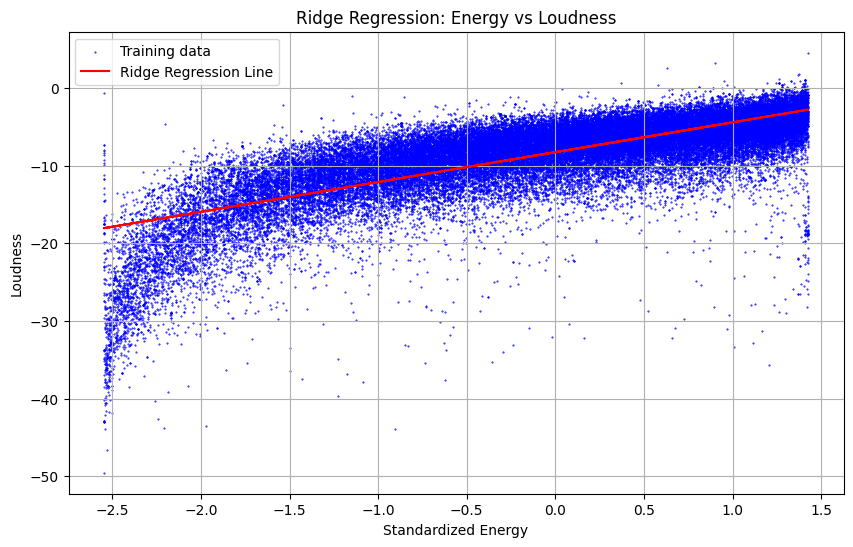

In [183]:


plt.figure(figsize=(10, 6))

# Scatter plot of the training data
plt.scatter(X_train_scaled, y_train, color='blue', s=0.2, label='Training data')

# Plot the regression line (fitted values on the training data)
plt.plot(X_train_scaled, y_pred_train, color='red', label='Ridge Regression Line')

# Labels and title
plt.title('Ridge Regression: Energy vs Loudness')
plt.xlabel('Standardized Energy')
plt.ylabel('Loudness')
plt.legend()
plt.grid(True)

plt.show()

### Results

The ridge regularization did not really help. The bias increased by a very small amount, from 3.2318 to 3.2323. The variance did not appear to change significantly. This makes sense since a model with only a single predictor variable does not need regularization